# Task 1: Specific heat capacity

- Determine the specific heat capacity of copper and aluminium from experimental data acquired with the Kalorimeter setup
- Determine whether the equipartition theorem holds for these substances.

Load necessary python packages for analysis and the experimental data

In [26]:
# Python Notebook Commands
# This option allows to have interactive plots
%matplotlib notebook
# This option is static plots
#matplotlib inline 

# Load necessary packages
import matplotlib.pyplot as plt # Plotting package
from matplotlib import rcParams
rcParams['figure.figsize'] = (6,3)
rcParams.update({'figure.autolayout': True})
import numpy as np # Package for treating numerical data
from scipy.optimize import curve_fit # Function to fit curves

# Load experimental data, the scan rates you can get from the header of the textfiles
water = np.loadtxt('water.txt',unpack=True)
alu = np.loadtxt('aluminium.txt',unpack=True)
copper = np.loadtxt('copper.txt',unpack=True)

Plot the experimental data acquired with the Kalorimeter setup.
The data is stored in 3 columns: heating voltage, shunt voltage, bridge voltage.

<IPython.core.display.Javascript object>


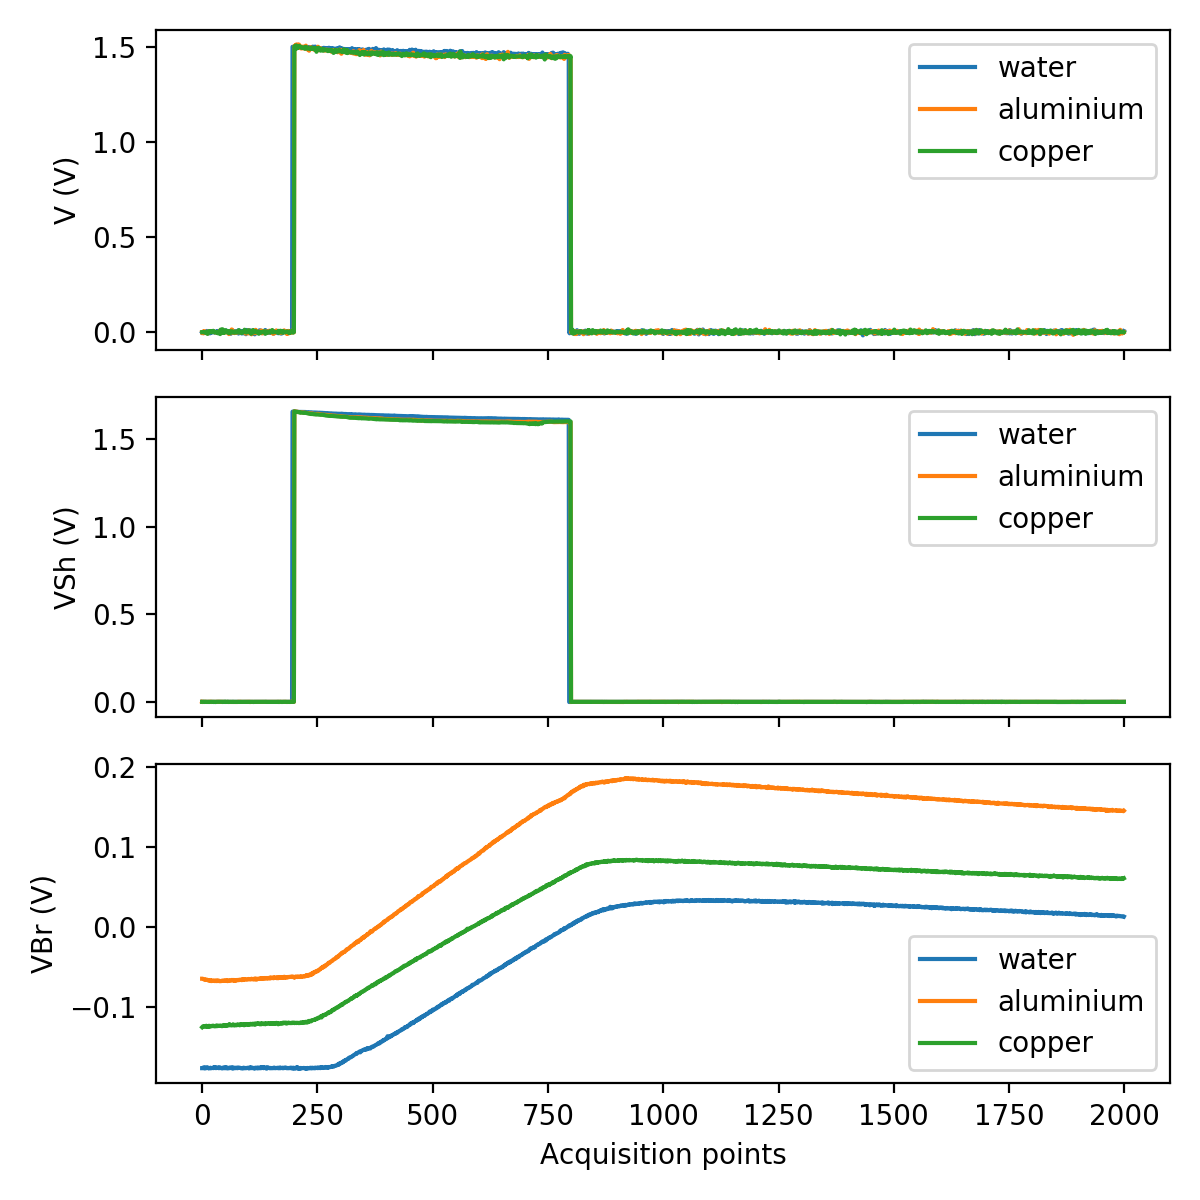

In [27]:
f,a=plt.subplots(3,1,sharex=True,figsize=(6,6))
a[0].plot(water[0],label='water')
a[0].plot(alu[0],label='aluminium')
a[0].plot(copper[0],label='copper')
a[0].set(ylabel='V (V)')
a[0].legend()

a[1].plot(water[1],label='water')
a[1].plot(alu[1],label='aluminium')
a[1].plot(copper[1],label='copper')
a[1].set(ylabel='VSh (V)')
a[1].legend()

a[2].plot(water[2],label='water')
a[2].plot(alu[2],label='aluminium')
a[2].plot(copper[2],label='copper')
a[2].set(xlabel='Acquisition points',ylabel='VBr (V)')
a[2].legend()

Convert the acquisition points to a time vector by using the following:
- Each measurement consists of 2000 acquisitions
- Scan rate of water: 2.5 scans / second
- Scan rate with probes: 1 scans / second

In [24]:
# Calculate the time vectors
t = np.linspace(1,len(alu[0]),num=len(alu[0])) # Time vector in seconds for measurements with a probe
twater = t/2.5 # Time vector in seconds for the measurement with water

print(f"Measurement time water: {twater[-1]/60:3.1f} min") # twater[-1] returns the last time point in seconds
print(f"Measurement time aluminium/copper: {t[-1]/60:3.1f} min")

Measurement time water: 13.3 min
Measurement time aluminium/copper: 33.3 min


Compute and plot the instantaneous heating power as a function of time with the heating voltage and the shunt voltage. Note that:
- The heating current is given by $I = V_{Sh}/R_{Sh}$, where $R_{Sh} = 1\Omega$.
- The heating voltage needs to be multiplied by a factor of 10 due to the voltage divider employed.

<IPython.core.display.Javascript object>


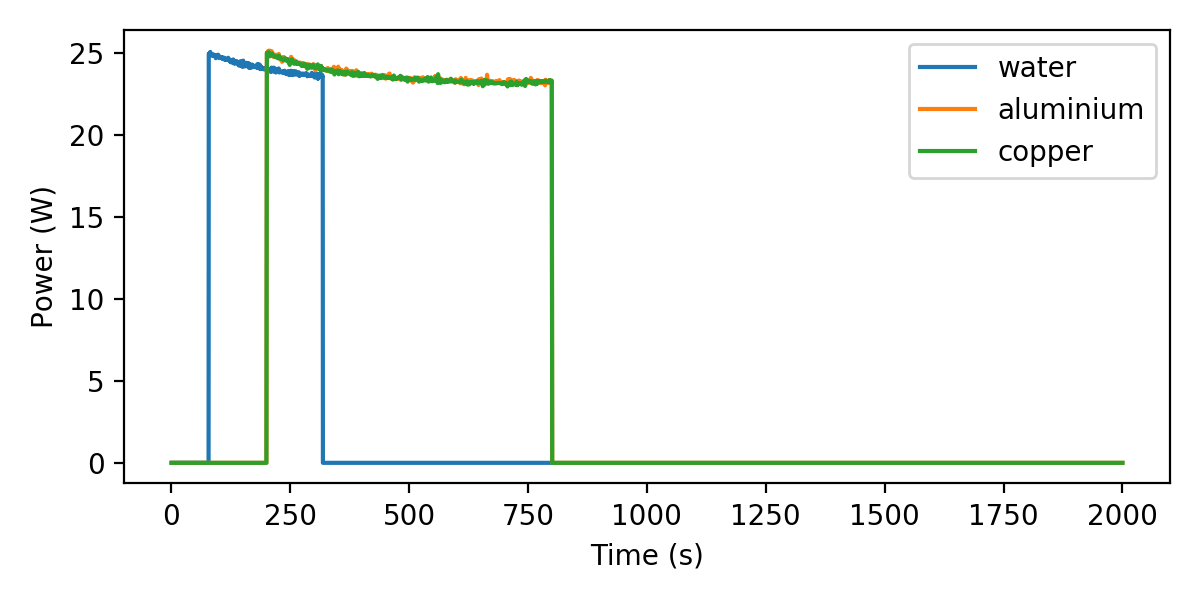

In [96]:
Pwater = water[0]*10*water[1] # This is a pieceswise multiplications of vectors (example [1,2,3]*[1,2,3] = [1,4,9] )
Palu = alu[0]*10*alu[1]
Pcopper = copper[0]*10*copper[1]

fp, ap = plt.subplots()
ap.plot(twater,Pwater,label='water')
ap.plot(t,Palu,label='aluminium')
ap.plot(t,Pcopper,label='copper')
ap.set(xlabel='Time (s)',ylabel='Power (W)')
ap.legend()

### & & & & & & & & & & & & & & & & & & & & ***Your part*** & & & & & & & & & & & & & & & & & & & & & & & & & & 

Fill in the blanks : Please zoom on the power vs. time plot and find the indices when heat pulse is on for Water, Copper and Aluminium

### & & & & & & & & & & & & & & & & & & & & & & &  & & & & & & & & & & & & & & & & & & & & & & & & & & &  &

<IPython.core.display.Javascript object>


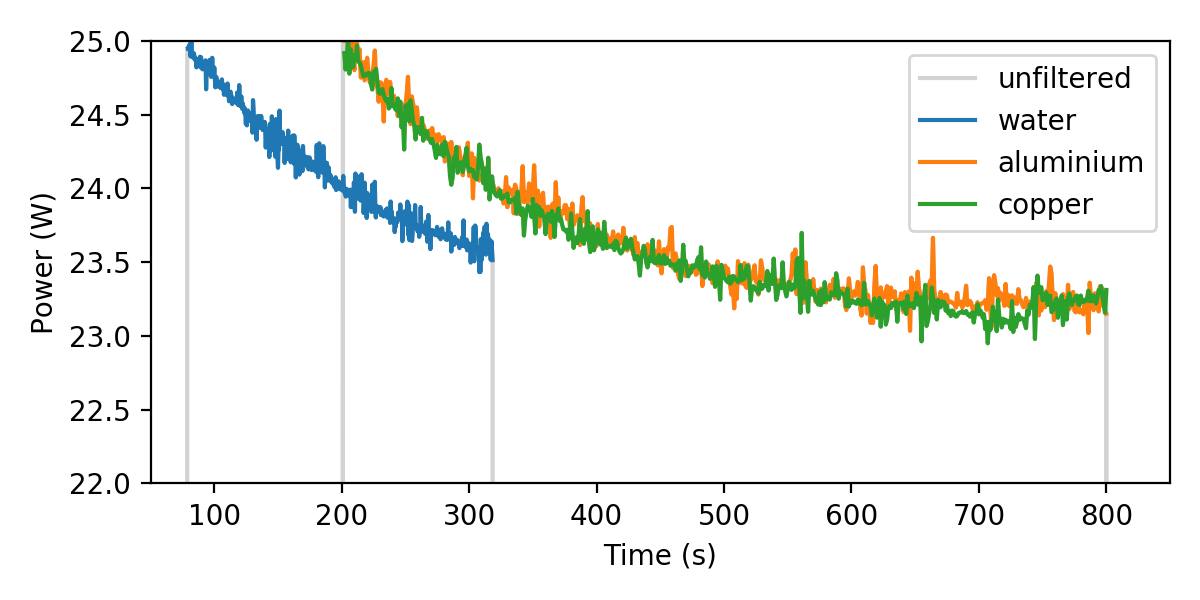

Water: 
Pulse duration = 239.60 s
dQintegrated = 5765.52 J, dQaverage = 5775.21 J
********************************************************************
Aluminium: 
Pulse duration = 599.00 s
dQintegrated = 14137.80 J, dQaverage = 14161.87 J
********************************************************************
Copper: 
Pulse duration = 599.00 s
dQintegrated = 14110.54 J, dQaverage = 14134.66 J
********************************************************************


In [97]:
#Before running this cell, determine ind_wat_start, ind_wat_start, ind_cop_start, ind_cop_start, 
#ind_alu_start, and ind_alu_start
# Filter heat pulse with indices for water(be careful for water time=indice/2.5)
ind_wat_start = 197
ind_wat_end = 796
#  Filter heat pulse with indices for Copper
ind_cop_start = 201
ind_cop_end = 800
#  Filter heat pulse with indices for Copper
ind_alu_start = 201
ind_alu_end = 800




# Plot to illustrate the filtering
fpf, apf = plt.subplots()
apf.plot(twater,Pwater,color='lightgray',label='unfiltered')
apf.plot(t,Palu,color='lightgray')
apf.plot(t,Pcopper,color='lightgray')
apf.plot(twater[ind_wat_start:ind_wat_end],Pwater[ind_wat_start:ind_wat_end],label='water')

apf.plot(t[ind_alu_start:ind_alu_end],Palu[ind_alu_start:ind_alu_end],label='aluminium')
apf.plot(t[ind_cop_start:ind_cop_end],Pcopper[ind_cop_start:ind_cop_end],label='copper')
apf.set(xlabel='Time (s)',ylabel='Power (W)')
apf.set(xlim=(50,850),ylim=(22,25))
apf.legend()

# Average the instantaneous power and multiply the time interval where the heat pulse is applied
dtw = twater[ind_wat_end]-twater[ind_wat_start]
dQwater_avg = np.average(Pwater[ind_wat_start:ind_wat_end])*dtw

dtalu = t[ind_alu_end]-t[ind_alu_start]
dQalu_avg = np.average(Palu[ind_alu_start:ind_alu_end])*dtalu

dtcopper = t[ind_cop_end]-t[ind_cop_start]
dQcopper_avg = np.average(Pcopper[ind_cop_start:ind_cop_end])*dtcopper

# Integrate the instantaneous power to compute the heat energy
dQwater = np.trapz(Pwater[ind_wat_start:ind_wat_end],x=twater[ind_wat_start:ind_wat_end])
dQalu = np.trapz(Palu[ind_alu_start:ind_alu_end],x=t[ind_alu_start:ind_alu_end])
dQcopper = np.trapz(Pcopper[ind_cop_start:ind_cop_end],x=t[ind_cop_start:ind_cop_end])

# Print results
print("Water: ")
print(f"Pulse duration = {dtw:3.2f} s")
print(f"dQintegrated = {dQwater:3.2f} J, dQaverage = {dQwater_avg:3.2f} J")
print("********************************************************************")
print("Aluminium: ")
print(f"Pulse duration = {dtalu:3.2f} s")
print(f"dQintegrated = {dQalu:3.2f} J, dQaverage = {dQalu_avg:3.2f} J")
print("********************************************************************")
print("Copper: ")
print(f"Pulse duration = {dtcopper:3.2f} s")
print(f"dQintegrated = {dQcopper:3.2f} J, dQaverage = {dQcopper_avg:3.2f} J")
print("********************************************************************")

### & & & & & & & & & & & & & & & & & & ***Comparison and Discussion*** & & & & & & & & & & & & & & & & & & & &

What are the differences between dQaverage and dQintegrated? Which one is overstimating?
### & & & & & & & & & & & & & & & & & &  & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & & &


Convert the bridge signal into a temperature with the bridge signal using the thermometer calibration curve of the kalorimeter:
$$ T = A_0 + A_1\cdot V_{Br} + A_2\cdot V_{Br}^{2} $$


<IPython.core.display.Javascript object>


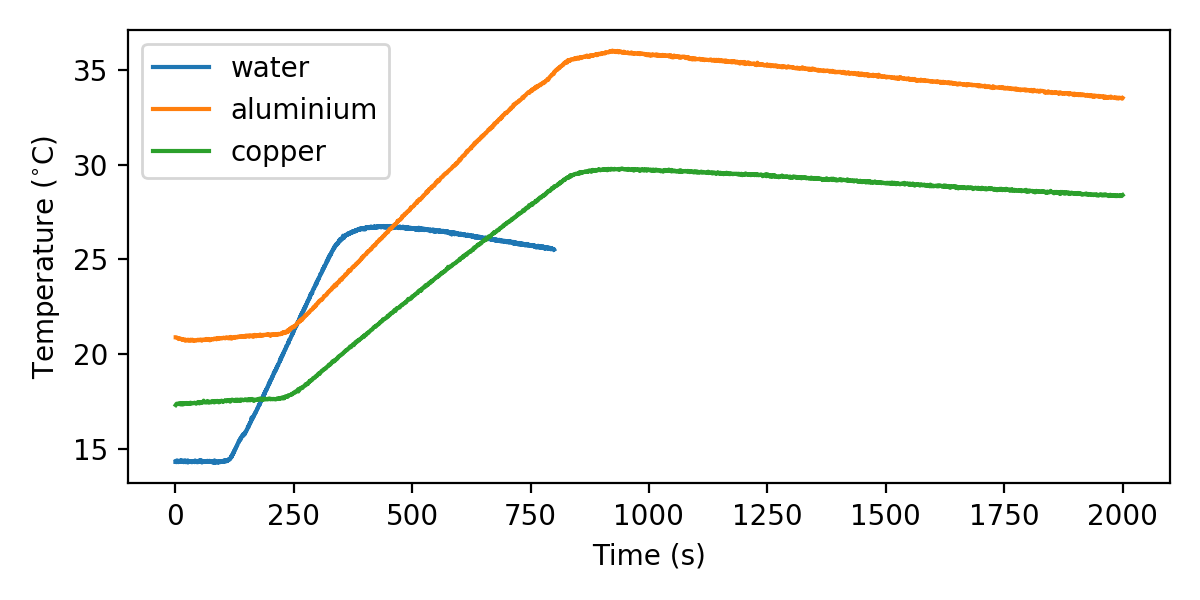

In [98]:
A0 = 24.73
A1 = 59.81
A2 = 4.26 
Twater = A0 + A1*water[2]+A2*np.power(water[2],2)
Talu = A0 + A1*alu[2]+A2*np.power(alu[2],2)
Tcopper = A0 + A1*copper[2]+A2*np.power(copper[2],2)

fT,aT = plt.subplots()
aT.plot(twater,Twater,label='water')
aT.plot(t,Talu,label='aluminium')
aT.plot(t,Tcopper,label='copper')
aT.set(xlabel='Time (s)',ylabel='Temperature ($^{\circ}$C)')
aT.legend()

### & & & & & & & & & & & & & & & & & & & & ***Your part*** & & & & & & & & & & & & & & & & & & & & & & & & & & 

- Extract $\dot{T}$  and $F = \int_{t_S}^{t_G} (T-T_1) dt$ for all three measurements.
- Try a few different points for $t_g$ and different interval lengths for the linear fit (dint)
- Discuss the impact of changing $t_g$ and dint on  $\dot{T}$ and F

### & & & & & & & & & & & & & & & & & & & & & & &  & & & & & & & & & & & & & & & & & & & & & & & & & & &  &

Water with $m_{water} = 45 \text{g}$

<IPython.core.display.Javascript object>


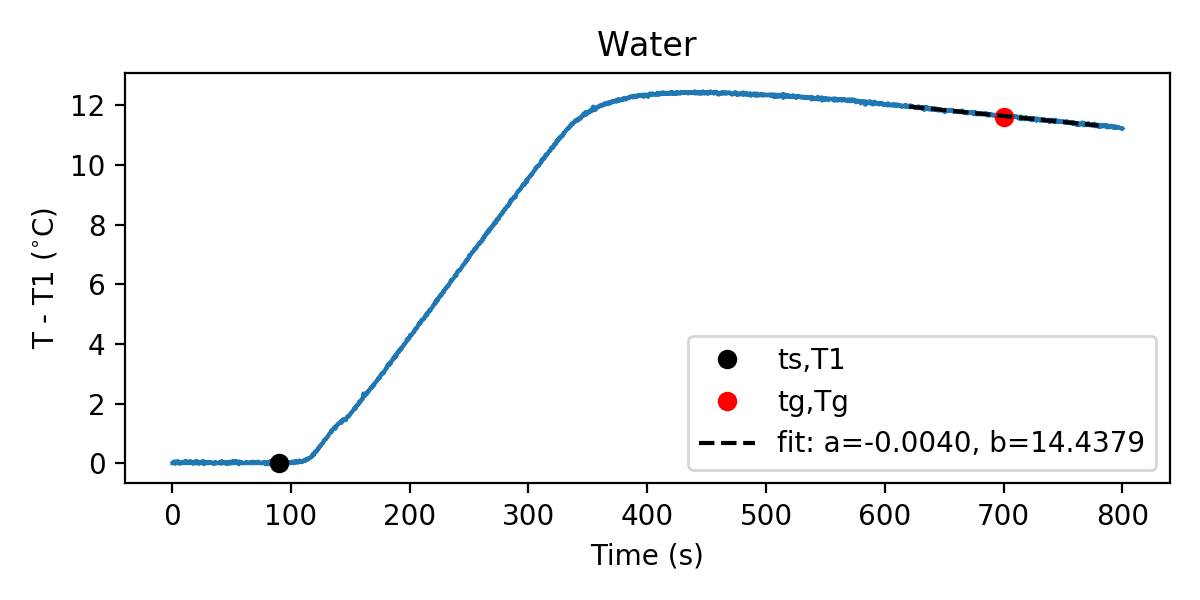

Water:
 Integral F = 5.7e+03 K s
 dT/dt = -4.00e-03 K/s
 delta T = 11.605622334336559 K


In [99]:
#***************************************************
# Set ts and tg by choosing the indices.
# Remember that each measurement consists of 2000 points.
# The point is then (t[ind_tg_w],DT_water[ind_tg_w]).
#***************************************************
# Remember that each measurement consists of 2000 points
# Chose here the index 
#ind_ts_w = 0
ind_ts_w = 225
ind_tg_w = 1750
T1_water = Twater[ind_ts_w]
DT_water = Twater - T1_water
deltaT = Twater[ind_tg_w] - T1_water

# Integrate T-T1 from ts to tg
Fwater = np.trapz(DT_water[ind_ts_w:ind_tg_w],x=twater[ind_ts_w:ind_tg_w])

#***************************************************
# Change here the range where the slope should be fitted
# The linear curve is fitted around tg:
# [tg-dt, tg+dt]
# Note that index dint has to be chosen such that:
# ind_tg_w + dint <= 1999
# Otherwise the fitting range exceeds the 
# vector lengths and it will give an error!
#***************************************************
dint = 200
# Define to function to be fitted
def func(x,a,b):
    return a*x+b

# Fit the linear curve f(x)=ax+b linear around  slope to extract a = dT/dt
popt, pcov = curve_fit(func, twater[ind_tg_w-dint:ind_tg_w+dint], DT_water[ind_tg_w-dint:ind_tg_w+dint])
#***************************************************

fTW, aTW = plt.subplots()
aTW.plot(twater,DT_water)
aTW.plot(twater[ind_ts_w],DT_water[ind_ts_w],'o',color='black',label='ts,T1')
aTW.plot(twater[ind_tg_w],DT_water[ind_tg_w],'o',color='red',label='tg,Tg')
# Plot the linear fit
aTW.plot(twater[ind_tg_w-dint:ind_tg_w+dint], func(twater[ind_tg_w-dint:ind_tg_w+dint], *popt),'--',
         color='black',label='fit: a=%5.4f, b=%5.4f' % tuple(popt))
aTW.set(xlabel='Time (s)',ylabel='T - T1 ($^{\circ}$C)',Title='Water')
aTW.legend()

Tdot_water = popt[0] # First entry is a and second is b

# Print results
print("Water:")
print(f" Integral F = {Fwater:3.2} K s")
print(f" dT/dt = {Tdot_water:3.2e} K/s")
print(f" delta T = {deltaT} K")

Aluminium with $m_{aluminium} = 475 \text{g} $

<IPython.core.display.Javascript object>


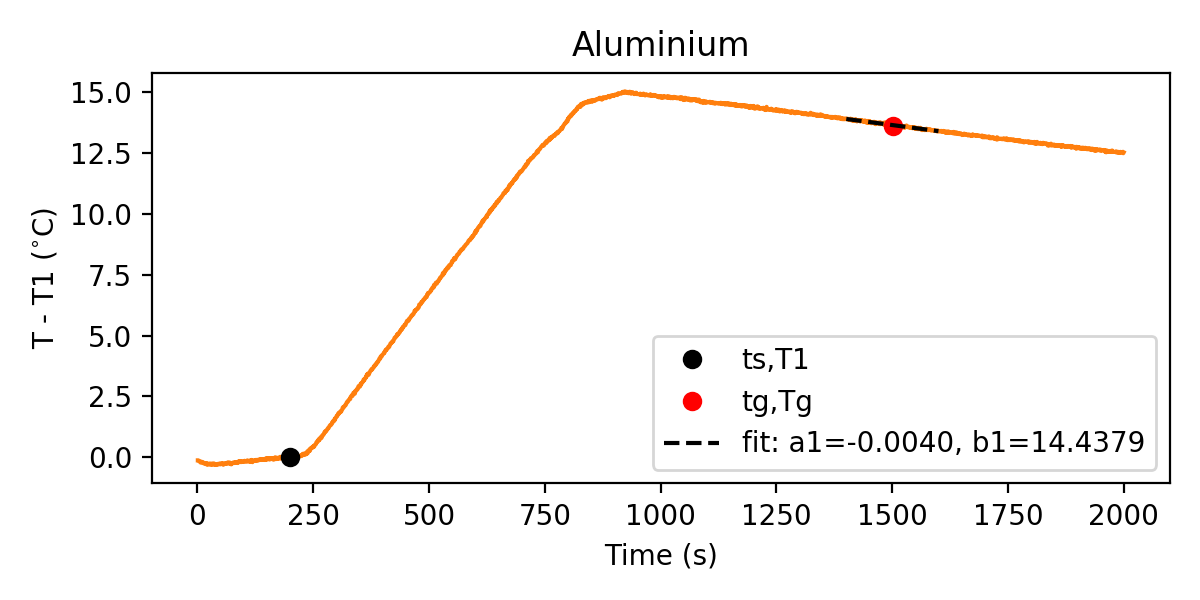

Aluminium: 
 Integral F = 14106.12 K s
 dT/dt = -2.51e-03 K/s
 delta T = 13.604008257886939 K


In [107]:
# Set ts and tg
ind_ts_alu = 200
ind_tg_alu = 1500
T1_alu = Talu[ind_ts_alu]
DT_alu = Talu - T1_alu
deltaT = Talu[ind_tg_alu] - T1_alu

# Integrate T-T1 from ts to tg
Falu= np.trapz(DT_alu[ind_ts_alu:ind_tg_alu],x=t[ind_ts_alu:ind_tg_alu])

# Fit a linear slope to extract dT/dt
def func(x,a1,b1):
    return a1*x+b1

from scipy.optimize import curve_fit
# Change the range where the slope should be fitted
dint = 100
popt1, pcov1 = curve_fit(func, t[(ind_tg_alu-dint):(ind_tg_alu+dint)], DT_alu[(ind_tg_alu-dint):(ind_tg_alu+dint)])

fTA, aTA = plt.subplots()
aTA.plot(t,DT_alu,color='tab:orange')
aTA.plot(t[ind_ts_alu],DT_alu[ind_ts_alu],'o',color='black',label='ts,T1')
aTA.plot(t[ind_tg_alu],DT_alu[ind_tg_alu],'o',color='red',label='tg,Tg')
# Plot the linear fit
aTA.plot(t[ind_tg_alu-dint:ind_tg_alu+dint], func(t[ind_tg_alu-dint:ind_tg_alu+dint], *popt1),'--',
         color='black',label='fit: a1=%5.4f, b1=%5.4f' % tuple(popt))
aTA.set(xlabel='Time (s)',ylabel='T - T1 ($^{\circ}$C)',Title='Aluminium')
aTA.legend()

Tdot_alu = popt1[0] # First entry is a and second is b

# Print results
print("Aluminium: ")
print(f" Integral F = {Falu:3.2f} K s")
print(f" dT/dt = {Tdot_alu:3.2e} K/s")
print(f" delta T = {deltaT} K")

Copper with $m_{copper} = 1547 \text{g} $

<IPython.core.display.Javascript object>


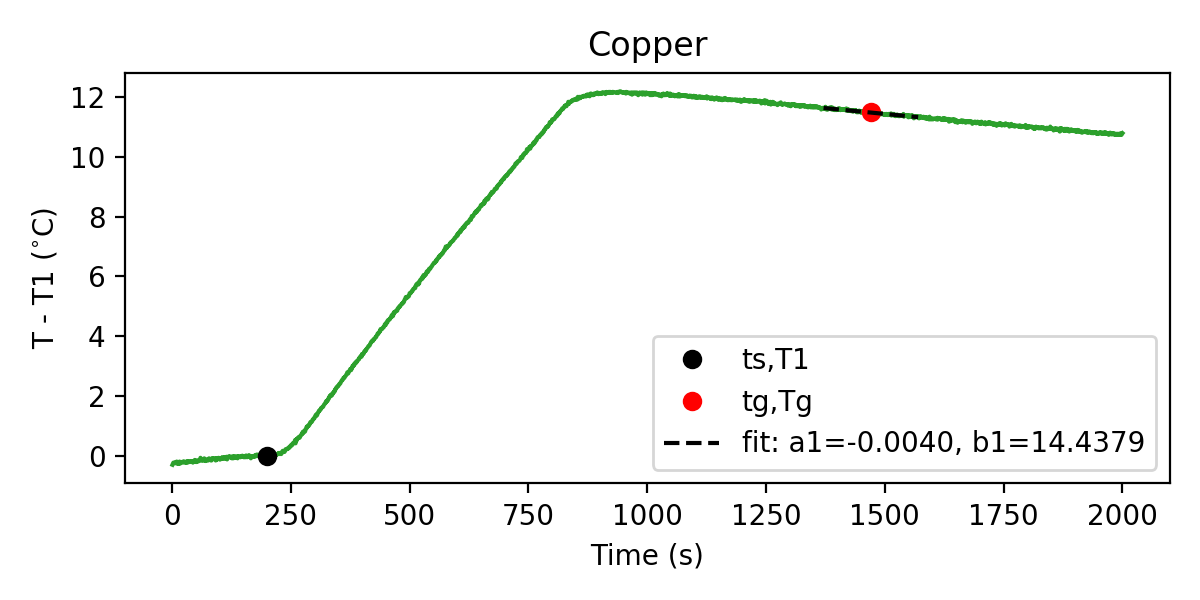

Copper: 
 Integral F = 11179.58 K s
 dT/dt = -1.54e-03 K/s
 delta T = 11.49704614514496 K


In [109]:
# Set ts and tg
ind_ts_copper = 200
ind_tg_copper = 1470
T1_copper = Tcopper[ind_ts_copper]
DT_copper = Tcopper - T1_copper
deltaT = Tcopper[ind_tg_copper] - T1_copper

# Integrate T-T1 from ts to tg
Fcopper= np.trapz(DT_copper[ind_ts_copper:ind_tg_copper],x=t[ind_ts_copper:ind_tg_copper])

# Fit a linear slope to extract dT/dt
def func(x,a2,b2):
    return a2*x+b2

from scipy.optimize import curve_fit
# Change the range where the slope should be fitted
dint = 100
popt2, pcov2 = curve_fit(func, t[(ind_tg_copper-dint):(ind_tg_copper+dint)], DT_copper[(ind_tg_copper-dint):(ind_tg_copper+dint)])

fTC, aTC = plt.subplots()
aTC.plot(t,DT_copper,color='tab:green')
aTC.plot(t[ind_ts_copper],DT_copper[ind_ts_copper],'o',color='black',label='ts,T1')
aTC.plot(t[ind_tg_copper],DT_copper[ind_tg_copper],'o',color='red',label='tg,Tg')
# Plot the linear fit
aTC.plot(t[ind_tg_copper-dint:ind_tg_copper+dint], func(t[ind_tg_copper-dint:ind_tg_copper+dint], *popt2),'--',
         color='black',label='fit: a1=%5.4f, b1=%5.4f' % tuple(popt))
aTC.set(xlabel='Time (s)',ylabel='T - T1 ($^{\circ}$C)',Title='Copper')
aTC.legend()

Tdot_copper = popt2[0] # First entry is a and second is b

# Print results
print("Copper: ")
print(f" Integral F = {Fcopper:3.2f} K s")
print(f" dT/dt = {Tdot_copper:3.2e} K/s")
print(f" delta T = {deltaT} K")

# Task 2: Cooking plate experiment
- For literature values you may consider the following reference (requires a vpn connection to the eth network): https://link.springer.com/content/pdf/10.1007%2F978-3-642-54166-7.pdf
- Remember the specific heat cpacity per kilogram under constant pressure: 
$$c = \frac{1}{m}\frac{\Delta Q}{\Delta T}$$

### & & & & & & & & & & & & & & & & & & & & ***Your part*** & & & & & & & & & & & & & & & & & & & & & & & & & & 

Fill in the blanks : Before running the following cells, please fill the places with ? using the data from your own experiment. Keep an eye on the units.

### & & & & & & & & & & & & & & & & & & & & & & &  & & & & & & & & & & & & & & & & & & & & & & & & & & &  &

In [102]:
# Specific heat capacities of liquid water at 20C and atmoshperic pressure
c = 4.182 # kJ/(kg*K)
#CM = ? # J/(mol*K)

# Here you add your numbers
Tstart = 296.15 # Kelvin (If you don't have a thermometer assume 15 C)
Tboil = 372.15 # Kelvin
dT = Tboil - Tstart #Temperature difference 

# Time needed to boil
dt = 200 #seconds
m = 0.5 #liter of water

dQ = m*c*dT
P = (dQ*1e3)/dt # Convert to Joule

# Print results
print(f"Heat difference: {dQ:3.2f} kJ")
print(f"Power of the cooking plate: {P:3.2f} W")

Heat difference: 158.92 kJ
Power of the cooking plate: 794.58 W


### Optional: determine the  initial temperature with a water boiler and re-calculate the cooking plate power
$$\Delta T = T_{boil} - T_{initial} = \frac{ P_{nominal}\cdot \Delta t}{c\cdot m} 
\quad \Rightarrow \quad 
T_{initial} = T_{boil} -  \frac{ P_{nominal}\cdot \Delta t}{c\cdot m}$$

In [103]:
# Calculate initial temperature with water-boiler measurement
Pnom =  #power of the water boiler
# Time needed to boil with the water boiler
dt_wb = ? # seconds
Tini = Tboil - (Pnom*dt_wb*1e-3)/(c*m)
print(f"Initial water temperature: {Tini:3.2f} K")

# Re-calculate the power of the cooking plate
dT_new = Tboil - Tini
Pnew = (m*c*dT_new*1e3)/dt
print(f"Power of the cooking plate: {Pnew:3.2f} W")

SyntaxError: invalid syntax (<ipython-input-103-cce38381143f>, line 2)

## Determine the specific heat of vaporization of water
$$ \lambda_D = \frac{P_{plate}\cdot\Delta t_{boil}}{\Delta m}$$

In [104]:
dt_boil = 10*60 # seconds, 10min of boiling
dm = m -0.26  # Water left after boiling in liter

Qin = P*dt_boil #Power
lam_d = (Qin/dm)*1e-3
lam_d_lit = 2260 # Specific heat of vaporization for water in literature in kJ/kg
err = (1-lam_d/lam_d_lit)*100 # Error in percent

print(f"Specific heat of vaporization: {lam_d:3.2f} kJ/kg")
print(f"Error with respect to literature value: {err:3.2f} %")

Specific heat of vaporization: 1986.45 kJ/kg
Error with respect to literature value: 12.10 %
